In [1]:

!pip install nltk

In [2]:
import pandas as pd

In [3]:
messages = pd.read_csv('/content/drive/MyDrive/datasets/SMSSpamCollection', sep = '\t', names =['label', 'message'])

In [4]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#EDA

In [5]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
messages[messages['message']=="Sorry, I'll call later"].count()

label      30
message    30
dtype: int64

In [8]:
messages.groupby('label').describe()
#from here you can see there are repetition in the data

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

##Feature Engineering

In [9]:
messages['length'] = messages['message'].apply(len)

In [10]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

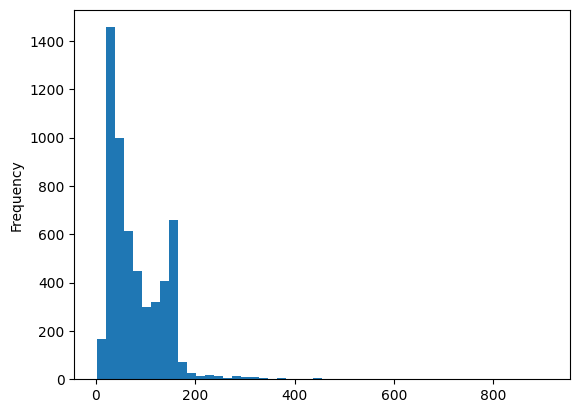

In [12]:
messages['length'].plot(bins=50, kind ='hist')

In [13]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
messages[messages.length == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

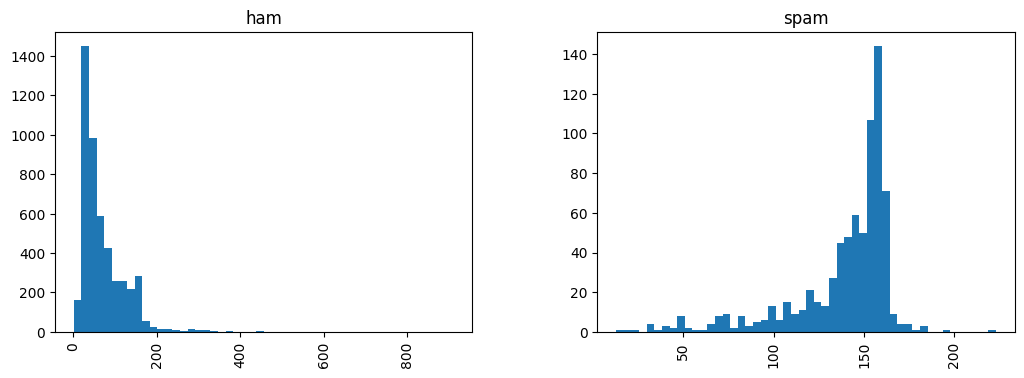

In [15]:
messages.hist(column='length', by='label', bins=50, figsize=(12,4))

#Text Preprocessing

In [16]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [17]:
import string

mes = 'Hi!! Ashish is using Machine Learning. #aisociety'

In [18]:
noPunctuation = [char for char in mes if char not in string.punctuation]
noPunctuation = ''.join(noPunctuation)

In [19]:
noPunctuation

'Hi Ashish is using Machine Learning aisociety'

In [20]:
from nltk.corpus import stopwords

In [21]:
noPunctuation.split()

['Hi', 'Ashish', 'is', 'using', 'Machine', 'Learning', 'aisociety']

In [22]:
clean_mes = [word for word in noPunctuation.split() if word.lower() not in stopwords.words('english')]

In [23]:
clean_mes

['Hi', 'Ashish', 'using', 'Machine', 'Learning', 'aisociety']

In [24]:
from nltk.corpus import stopwords

def text_process(mes):
  '''
  Take the string from messages
  1. Remove all punctuations
  2. Remove the stopwords
  3. Return a list of the cleaned text
  '''

  noPunctuation = [char for char in mes if char not in string.punctuation]
  noPunctuation = ''.join(noPunctuation)

  return [word for word in noPunctuation.split() if word.lower() not in stopwords.words('english')]

In [25]:
text_process('Go!! Messi            is saying that Sewww #football') #testing the function

['Go', 'Messi', 'saying', 'Sewww', 'football']

In [26]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

#Vectorisation

- "better" is lemmatized to "good," its base form.
- the suffix "ing" is removed, yielding the base form "run". (stemming)

Three steps to convert lemmas into vector

1. Count how many times does a word occur in each message -> Term Frequency(TF).
2. Weigh the counts so that frequent tokens get lower weigh -> Inverse document frequency(IDF).

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
#Step1: Count how many times does a word occur in each message -> Term Frequency(TF).

bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [30]:
len(bow_transformer.vocabulary_) #unique words

11425

In [31]:
m4 = messages['message'][3]
m4

'U dun say so early hor... U c already then say...'

In [32]:
bow4 = bow_transformer.transform([m4])
print(bow4) # there are 7 unique and 2 words are repeated twice (U, say)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [33]:
# to check the word because above o/p is for system to understand
bow_transformer.get_feature_names_out()[4068]

'U'

In [34]:
messages_bow = bow_transformer.transform(messages['message'])

In [35]:
messages_bow.shape

(5572, 11425)

In [36]:
messages_bow.nnz

50548

#What is TF-IDF?

TF-IDF stands for Term Frequency-Inverse Document Frequency. It's a numerical statistic that reflects the importance of a word in a document relative to a collection of documents or a corpus.

Here's how it works:

1. **Term Frequency (TF)**: This measures how frequently a term occurs in a document. It's calculated by dividing the number of times a term appears in a document by the total number of terms in the document. The idea is that the more often a term appears in a document, the more important it might be to that document.

   **TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)**

2. **Inverse Document Frequency (IDF)**: This measures how important a term is across the entire corpus. Terms that occur frequently across many documents will have a lower IDF, whereas terms that occur rarely will have a higher IDF. It's calculated by dividing the total number of documents by the number of documents containing the term, then taking the logarithm of that quotient.

   **IDF(t) = log_e(Total number of documents / Number of documents with term t in it)**

3. **TF-IDF**: This is the product of TF and IDF. It's used to give weight to terms that are frequent within a document but rare across the corpus.

   **TF-IDF(t, d) = TF(t, d) * IDF(t)**

The higher the TF-IDF score for a term in a document, the more relevant that term is to the document.

TF-IDF is commonly used in various natural language processing tasks, including information retrieval, text mining, and search engine optimization.

Example:

- Document 1: "Introduction to Natural Language Processing".
- Document 2: "Applications of Natural Language Processing".
- Document 3: "Challenges in Natural Language Processing".

And let's consider the term "processing" for this example.

1. **Term Frequency (TF)**:
   - In Document 1, "processing" appears 3 times, and the total number of terms is 20. So, TF of "processing" in Document 1 = 3/20 = 0.15.
   - In Document 2, "processing" appears 2 times, and the total number of terms is 25. So, TF of "processing" in Document 2 = 2/25 = 0.08.
   - In Document 3, "processing" appears 1 time, and the total number of terms is 22. So, TF of "processing" in Document 3 = 1/22 = 0.045.

2. **Inverse Document Frequency (IDF)**:
   - The term "processing" appears in all three documents.
   - Total number of documents = 3.
   - Number of documents with the term "processing" = 3.
   - IDF of "processing" = log(3/3) = log(1) = 0.

3. **TF-IDF**:
   - For Document 1: TF-IDF of "processing" = TF * IDF = 0.15 * 0 = 0.
   - For Document 2: TF-IDF of "processing" = TF * IDF = 0.08 * 0 = 0.
   - For Document 3: TF-IDF of "processing" = TF * IDF = 0.045 * 0 = 0.

In this example, the TF-IDF score for the term "processing" in all documents is 0 because the IDF value for "processing" is 0 since it appears in all documents.

However, if we consider a term like "challenges" or "introduction", which might be more specific to certain documents, they would have higher TF-IDF scores in those documents because their IDF values would not be 0.

In [37]:
#Step2: Weigh the counts so that frequent tokens get lower weigh -> Inverse document frequency(IDF).

from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [39]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4) #TF-IDF score

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [40]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['love']] #IDF score

4.773658523649919

In [41]:
#transform whole dataset/bag of words

messages_tfidf = tfidf_transformer.transform(messages_bow)

In [42]:
messages_tfidf.shape

(5572, 11425)

#Train Model - Wrong Way

Now machine will be able to understand the data(messages) and we can train the model because of tfidf values.

In [43]:
from sklearn.naive_bayes import MultinomialNB

#created Multinomial Object and the training have been done
spam_detector = MultinomialNB().fit(messages_tfidf, messages['label'])

Lets try some random message and put into ML model and check.

In [44]:
print('predicted', spam_detector.predict(tfidf4))
print('expected', messages.label[4])

predicted ['ham']
expected ham


In the above steps we used whole dataset to train which will be a problem in future. You need to remember that for predictions you need to select few rows so that it won't cost the computational power of the machine.

In [45]:
all_predictions = spam_detector.predict(messages_tfidf)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [47]:
confusion_matrix(messages['label'], all_predictions)

array([[4825,    0],
       [ 115,  632]])

#Train Test split

In [48]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

In [49]:
len(msg_train)

4457

In [50]:
len(msg_test)

1115

##Creating a data pipeline

In [51]:
from sklearn.pipeline import Pipeline

#you can use this line after text_function
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('clasifier', MultinomialNB())
])

In [52]:
pipeline.fit(X=msg_train, y=label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7c518134da20>)),
                ('tfidf', TfidfTransformer()), ('clasifier', MultinomialNB())])

In [53]:
predictions = pipeline.predict(msg_test)

In [54]:
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       994
        spam       0.74      1.00      0.85       121

    accuracy                           0.96      1115
   macro avg       0.87      0.98      0.92      1115
weighted avg       0.97      0.96      0.96      1115



In [55]:
confusion_matrix(predictions, label_test)

array([[952,  42],
       [  0, 121]])